Variance of Grades:
G1    10.990516
G2    14.143953
G3    20.894712
dtype: float64


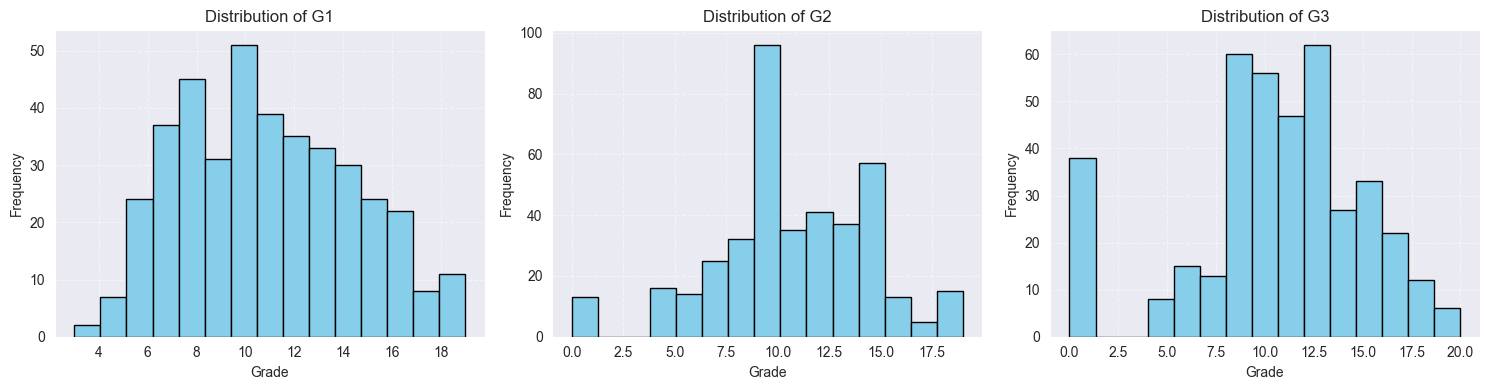

Variance of average grade:
13.640266215510861
school_GP <--> school_MS | Correlation: -1.00
famsize_GT3 <--> famsize_LE3 | Correlation: -1.00
schoolsup_no <--> schoolsup_yes | Correlation: -1.00
activities_no <--> activities_yes | Correlation: -1.00
nursery_no <--> nursery_yes | Correlation: -1.00
internet_no <--> internet_yes | Correlation: -1.00
romantic_no <--> romantic_yes | Correlation: -1.00
address_R <--> address_U | Correlation: -1.00
paid_no <--> paid_yes | Correlation: -1.00
Pstatus_A <--> Pstatus_T | Correlation: -1.00
higher_no <--> higher_yes | Correlation: -1.00
sex_F <--> sex_M | Correlation: -1.00
famsup_no <--> famsup_yes | Correlation: -1.00
guardian_father <--> guardian_mother | Correlation: -0.81
Fjob_other <--> Fjob_services | Correlation: -0.69
Dalc <--> Walc | Correlation: 0.65
Medu <--> Fedu | Correlation: 0.63

Features most correlated with G_avg (>|0.3|):

G_avg         1.000000
failures     -0.369775
Medu          0.211609
higher_yes    0.186569
higher_no    

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Math-Students.csv", sep=",")
grades = ['G1', 'G2', 'G3']
numeric = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
           'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
nonNumeric = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
          'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
          'higher', 'internet', 'romantic']

# Compute and print variance for G1, G2, G3
variances = data[grades].var()
print("Variance of Grades:")
print(variances)
# Plot distributions of grades
plt.figure(figsize=(15, 4))
for i, grade in enumerate(grades):
    plt.subplot(1, 3, i + 1)
    plt.hist(data[grade], bins=15, edgecolor='black', color='skyblue')
    plt.title(f'Distribution of {grade}')
    plt.xlabel('Grade')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Create G_avg
data['G_avg'] = data[grades].mean(axis=1)
print("Variance of average grade:")
print(data['G_avg'].var())
# Drop G1, G2, G3 to avoid leakage
data = data.drop(columns=grades)
# Encode categorical features
data = pd.get_dummies(data, drop_first=False)

# Find correlated pairs
corr_matrix = data.corr()
threshold = 0.6
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            feature_1 = corr_matrix.columns[i]
            feature_2 = corr_matrix.columns[j]
            high_corr_pairs.append((feature_1, feature_2, corr_value))
# Print high correlation pairs
for f1, f2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
    print(f"{f1} <--> {f2} | Correlation: {corr:.2f}")

# Correlation with G_avg
label_corr = corr_matrix['G_avg']
top_corr_threshold = 0.15
print("\nFeatures most correlated with G_avg (>|0.3|):\n")
print(label_corr[abs(label_corr) > top_corr_threshold].sort_values(key=abs, ascending=False))